In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Remove dodgy images

In [ ]:
data_dir = 'data'


image_exts = ['jpeg', 'jpg', 'png', 'bmp']


for architecture_epoch in os.listdir(data_dir):
    for architecture_style in os.listdir(os.path.join(data_dir, architecture_epoch)):
        for image in os.listdir(os.path.join(data_dir, architecture_epoch, architecture_style)):
            image_path = os.path.join(data_dir, architecture_epoch, architecture_style, image)
            try:
                img = cv2.imread(image_path)
                tip = imghdr.what(image_path)
                if tip not in image_exts:
                    print('Image not in ext list {}'.format(image_path))
                    os.remove(image_path)
            except Exception as e:
                print('Issue with image {}'.format(image_path))
                  os.remove(image_path)

# Import data

In [ ]:
!unzip -uq "/content/drive/My Drive/architecture_split_dataset.zip" -d "/content"

In [ ]:
# pip install split-folders

In [ ]:
# import splitfolders

# splitfolders.ratio("data", # The location of dataset
#                    output="architecture_split_dataset", # The output location
#                    seed=42, # The number of seed
#                    ratio=(.8, .15, .05), # The ratio of splited dataset
#                    group_prefix=None, # If your dataset contains more than one file like ".jpg", ".pdf", etc
#                    move=False # If you choose to move, turn this into True
#                    )

In [ ]:
train_dir = os.path.join('architecture_split_dataset', 'train')
validation_dir = os.path.join('architecture_split_dataset', 'val')
test_dir = os.path.join('architecture_split_dataset', 'test')

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = (512, 512)

In [ ]:

train_dataset = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                            shuffle=True,
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE)

Found 8442 files belonging to 45 classes.


In [ ]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(validation_dir,
                                                                 shuffle=True,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 2393 files belonging to 45 classes.


In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 batch_size=BATCH_SIZE,
                                                                 image_size=IMG_SIZE)

Found 1249 files belonging to 45 classes.


In [ ]:
import numpy as np
from matplotlib import pyplot as plt

['Achaemenid architecture', 'American Foursquare architecture', 'American craftsman style', 'Ancient Egyptian architecture', 'Andean Baroque Architecture', 'Art Deco architecture', 'Art Nouveau architecture', 'Baroque architecture', 'Bauhaus architecture', 'Beaux-Arts architecture', 'Blobitecture', 'Brutalism', 'Byzantine architecture', 'Chicago school architecture', 'Colonial Revival archtecture', 'Colonial architecture', 'Deconstructivism', 'Earthquake Baroque Architecture', 'Eco-architecture', 'Edwardian architecture', 'French Renaissance Architecture', 'Georgian architecture', 'Gothic architecture', 'Greek Revival architecture', 'Herodian architecture', 'International style', 'Mannerist Architecture', 'Medieval Architecture', 'Neo-futurism architecture', 'Norman Architecture', 'Northern Renaissance Architecture', 'Orientalism Architecture', 'Palladian architecture', 'Postmodern architecture', 'Queen Anne architecture', 'Rococo Architecture', 'Roman Classical architecture', 'Romanes

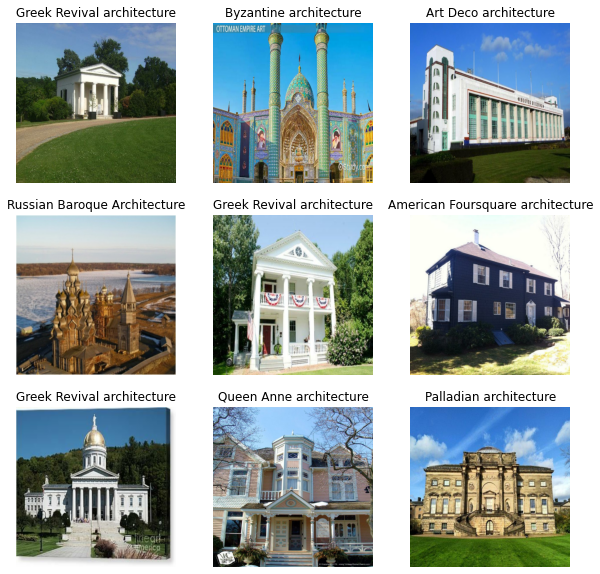

In [ ]:
class_names = train_dataset.class_names

print(class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of validation batches: 75
Number of test batches: 40


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.3, 0.2),
])

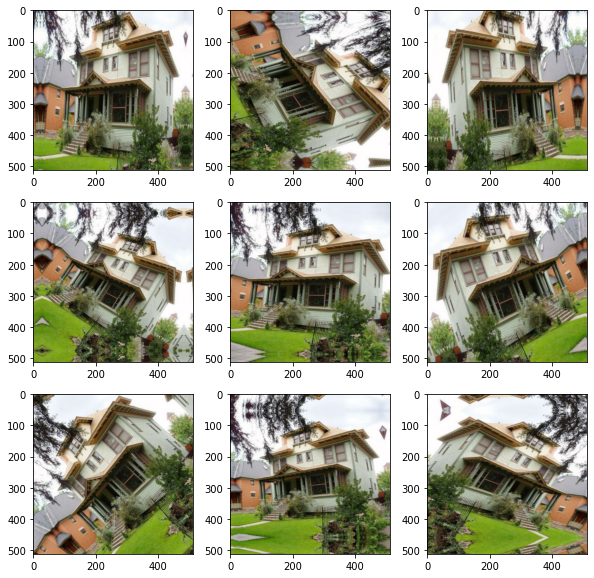

In [ ]:
for image, _ in train_dataset.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    # plt.axis('off')

In [ ]:
preprocess_input = tf.keras.applications.resnet50.preprocess_input

# NN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model, Sequential
from keras.activations import relu
from tensorflow.keras.layers import *
from tensorflow.keras import layers as Layers

In [ ]:
  IMG_SHAPE = IMG_SIZE + (3,)
  base_model = ResNet50(weights="imagenet", include_top=False, input_shape = IMG_SHAPE)

In [ ]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)
print (len(base_model.layers))

(32, 16, 16, 2048)
175


In [ ]:
#base_model.trainable = False

for layer in base_model.layers[:155]:
		layer.trainable = False
		
# for layer in base_model.layers[18:]:
# 		layer.trainable = True

In [ ]:
 base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 518, 518, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 256, 256, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
inputs = Input(shape=(512, 512, 3))
x = data_augmentation(inputs)

x = preprocess_input(x)
x = base_model(x)
x = AveragePooling2D(8,8)(x)
x = Flatten(name="flatten")(x)
x = Dropout(0.5)(x)
x = Dense(2048, activation="relu")(x)
x = Dropout(0.5)(x)
outputs = Dense(45, activation="softmax")(x)

In [ ]:
 model = Model(inputs, outputs)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-5)

model.compile(optimizer=opt, loss=tf.keras.losses.SparseCategoricalCrossentropy() , metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 512, 512, 3)       0         
                                                                 
 tf.__operators__.getitem (S  (None, 512, 512, 3)      0         
 licingOpLambda)                                                 
                                                                 
 tf.nn.bias_add (TFOpLambda)  (None, 512, 512, 3)      0         
                                                                 
 resnet50 (Functional)       (None, 16, 16, 2048)      23587712  
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 2048)       0         
 ooling2D)                                                   

# Train

In [ ]:
initial_epochs = 30

In [ ]:
loss0, accuracy0 = model.evaluate(test_dataset)

40/40 [==============================] - 24s 491ms/step - loss: 4.2129 - accuracy: 0.0120


In [ ]:
print("test loss: {:.2f}".format(loss0))
print("test accuracy: {:.2f}".format(accuracy0))

test loss: 4.21
test accuracy: 0.01


In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
history = model.fit(train_dataset,
                    epochs=50,
                    validation_data=validation_dataset)

Epoch 1/50
264/264 [==============================] - 222s 819ms/step - loss: 4.3215 - accuracy: 0.0641 - val_loss: 3.1245 - val_accuracy: 0.1738
Epoch 2/50
264/264 [==============================] - 220s 828ms/step - loss: 3.5199 - accuracy: 0.1394 - val_loss: 2.7581 - val_accuracy: 0.2733
Epoch 3/50
264/264 [==============================] - 220s 829ms/step - loss: 3.1294 - accuracy: 0.1951 - val_loss: 2.4915 - val_accuracy: 0.3289
Epoch 4/50
264/264 [==============================] - 220s 828ms/step - loss: 2.8445 - accuracy: 0.2546 - val_loss: 2.2657 - val_accuracy: 0.3899
Epoch 5/50
264/264 [==============================] - 220s 829ms/step - loss: 2.6592 - accuracy: 0.2905 - val_loss: 2.1043 - val_accuracy: 0.4225
Epoch 6/50
264/264 [==============================] - 220s 830ms/step - loss: 2.4962 - accuracy: 0.3273 - val_loss: 1.9748 - val_accuracy: 0.4534
Epoch 7/50
264/264 [==============================] - 220s 829ms/step - loss: 2.3854 - accuracy: 0.3524 - val_loss: 1.8832 -

# Plot

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from keras.models import load_model

MODEL_PATH = './drive/My Drive/model.h5'

# Now save model in drive
#model.save(MODEL_PATH)

# Load Model
#model = load_model(MODEL_PATH)

In [ ]:
predicted_classes = np.array([])
labels =  np.array([])

for x, y in test_dataset:
  predicted_classes = np.concatenate([predicted_classes,
                       np.argmax(model.predict(x), axis = -1)])
  labels = np.concatenate([labels, y.numpy()])    

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

score = model.evaluate(test_dataset, verbose=0)
cm = confusion_matrix(labels, predicted_classes)

plt.figure(figsize=(50,50))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', yticklabels=class_names, xticklabels=class_names)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Model Accuracy Score: {score[1]:.2%}'
plt.title(all_sample_title, size = 15)
plt.savefig('foo.png')

print(classification_report(labels, predicted_classes, target_names=class_names))